## Data and libraries import

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data-viz
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcdefaults() # get the default theme

# modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing


# for ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# loading the data 
credit = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/wk11_credit_card.csv")

## Data Inspection

In [3]:
# get the shape of the dataset
print(credit.shape)

# data types of the columns
print(credit.info())

# check few rows of the data 
display(credit.head(8))

(28, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Customer credit score           28 non-null     int64 
 1   Customer age                    28 non-null     int64 
 2   Category of customer behaviour  28 non-null     object
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes
None


,Customer credit score,Customer age,Category of customer behaviour
0,570,57,Regular card user
1,600,31,Infrequent card user
2,610,36,Infrequent card user
3,590,45,Infrequent card user
4,620,50,Regular card user
5,640,42,Regular card user
6,640,61,Regular card user
7,650,38,Infrequent card user


In [4]:
# How to check for the missing values?
credit.isna().sum()

Customer credit score             0
Customer age                      0
Category of customer behaviour    0
dtype: int64

## Data Cleaning

 * Change the column names

In [5]:
# How to change the names of the column?
credit.columns

# Customer credit score --> score
# Customer age --> age
# Category of customer behaviour --> behaviour

credit.rename(columns = {'Customer credit score':"score", 
                                  'Category of customer behaviour': 'behaviour', 
                                 'Customer age' :'age'}, inplace = True)


credit.head()

,score,age,behaviour
0,570,57,Regular card user
1,600,31,Infrequent card user
2,610,36,Infrequent card user
3,590,45,Infrequent card user
4,620,50,Regular card user


## Exploratory Data analysis

### Simple Scatter plot

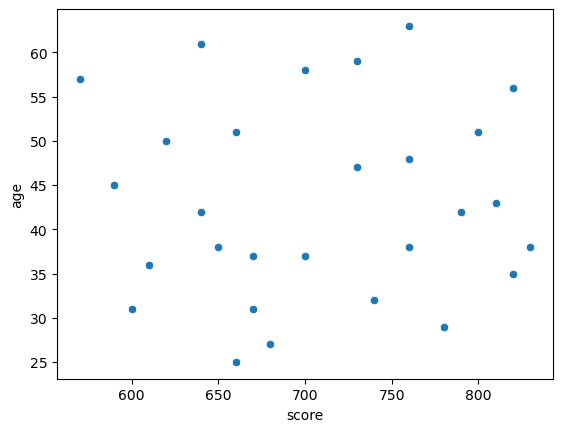

In [6]:
sns.scatterplot(x = "score", y = "age", data = credit);

**Transform the above chart to the chart below**

In [7]:
credit.score.max()

830

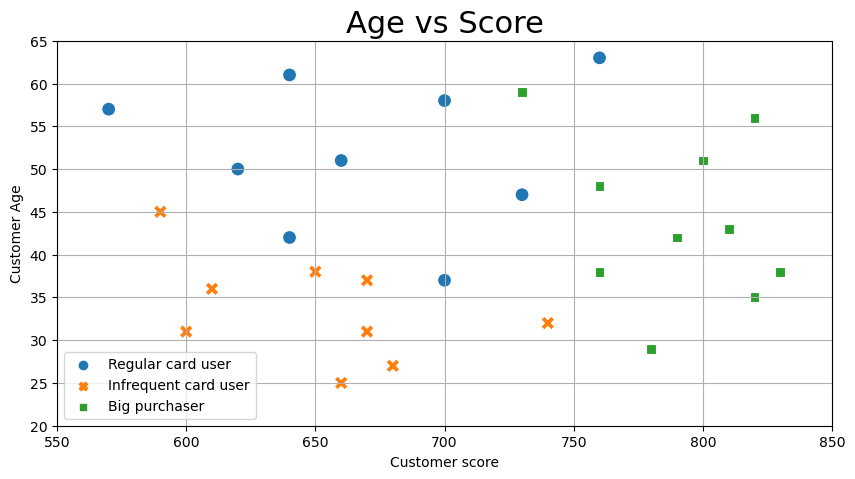

In [8]:
plt.figure(figsize = (10, 5 ))

sns.scatterplot(x = "score", y = "age", data = credit, hue="behaviour", style = "behaviour", s= 100);

# adding labels
plt.ylabel("Customer Age");
plt.xlabel("Customer score")
plt.title("Age vs Score", fontsize = 22);

# axis limits
# plt.xlim([credit.score.min(), credit.score.max()]);
plt.grid()

plt.xlim([550, 850]);
plt.ylim([20, 65]);
plt.legend( loc = 'lower left');


### Modifying the scatter plot

* Increase the size of the chart
* Give proper names: x-axis, y-axis and title
* Limit the axis 
    * x-axis = 550 to 850 
    * y-axis = 20 to 65
* Within Scatter plot:
    * increase the size of dots 
    * change the shape of the dots (marker shapes)

[`matplotlib` marker library](https://matplotlib.org/3.1.1/api/markers_api.html)

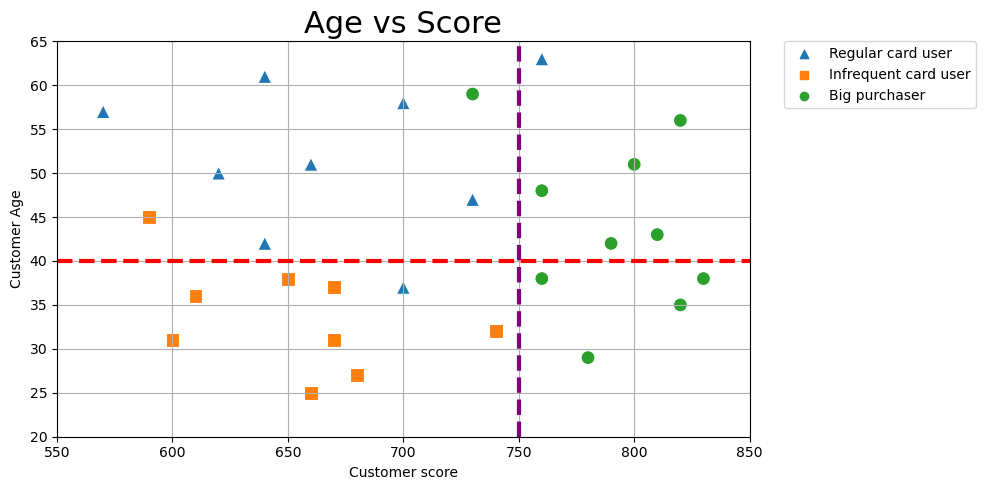

In [11]:
plt.figure(figsize = (10, 5 ))

sns.scatterplot(x = "score", y = "age", data = credit, hue="behaviour", style = "behaviour", s= 100
                   ,markers = {'Regular card user': "^", 
                               'Infrequent card user': "s", 
                                'Big purchaser' : "o" })
# adding labels
plt.ylabel("Customer Age");
plt.xlabel("Customer score")
plt.title("Age vs Score", fontsize = 22);

# axis limits
# plt.xlim([credit.score.min(), credit.score.max()]);
plt.grid()

# add lines
plt.axvline(x= 750, color = "purple", linewidth = 3, linestyle = '--')
plt.axhline(y= 40, color = "red", linewidth = 3, linestyle = '--')


plt.xlim([550, 850]);
plt.ylim([20, 65]);
# plt.legend( loc = 'lower left');

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.);

plt.tight_layout()
plt.savefig("age_vs_score.png", dpi = 300)

### Visualizing Data Splits

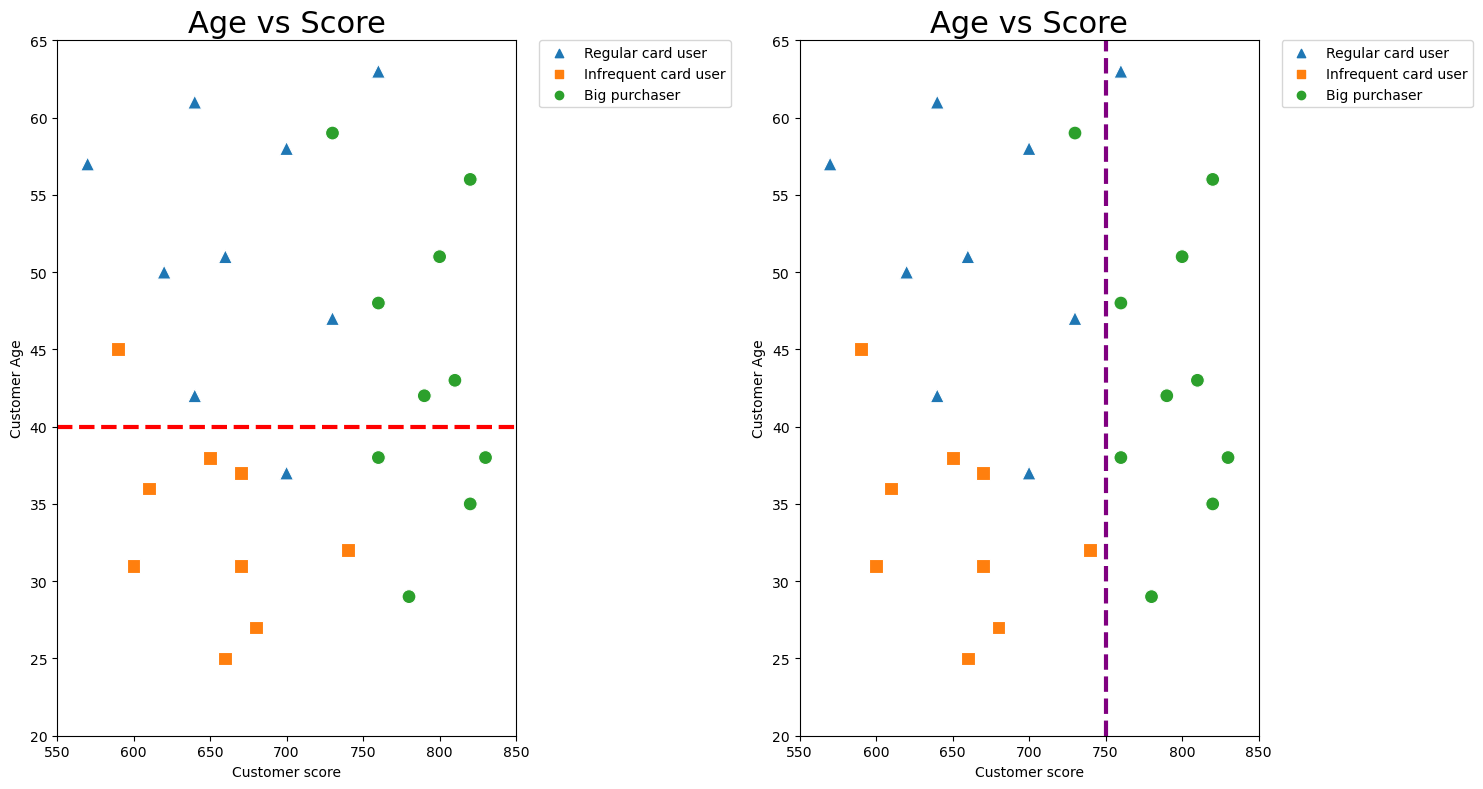

In [12]:
plt.figure(figsize = (15, 8))

plt.subplot(1,2, 1) # 1 row, 1 column
sns.scatterplot(x = "score", y = "age", data = credit, hue="behaviour", style = "behaviour", s= 100
                   ,markers = {'Regular card user': "^", 
                               'Infrequent card user': "s", 
                                'Big purchaser' : "o" })
# adding labels
plt.ylabel("Customer Age");
plt.xlabel("Customer score")
plt.title("Age vs Score", fontsize = 22);

# axis limits
# plt.xlim([credit.score.min(), credit.score.max()]);

# add lines
plt.axhline(y= 40, color = "red", linewidth = 3, linestyle = '--')


plt.xlim([550, 850]);
plt.ylim([20, 65]);
# plt.legend( loc = 'lower left');

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.);

plt.tight_layout()

# SECOND CHART
plt.subplot(1,2, 2) # 1 row, 2 column
sns.scatterplot(x = "score", y = "age", data = credit, hue="behaviour", style = "behaviour", s= 100
                   ,markers = {'Regular card user': "^", 
                               'Infrequent card user': "s", 
                                'Big purchaser' : "o" })
# adding labels
plt.ylabel("Customer Age");
plt.xlabel("Customer score")
plt.title("Age vs Score", fontsize = 22);

# axis limits
# plt.xlim([credit.score.min(), credit.score.max()]);

# add lines
plt.axvline(x= 750, color = "purple", linewidth = 3, linestyle = '--')


plt.xlim([550, 850]);
plt.ylim([20, 65]);
# plt.legend( loc = 'lower left');

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad=0.);

plt.tight_layout()

### Calculating the distribution

In [13]:
# How do we get the distribution of the card types?
print(credit.behaviour.value_counts())

print("\n") 

# show the ratio
print(credit.behaviour.value_counts(normalize = True).round(2))

Big purchaser           10
Regular card user        9
Infrequent card user     9
Name: behaviour, dtype: int64


Big purchaser           0.36
Regular card user       0.32
Infrequent card user    0.32
Name: behaviour, dtype: float64


## Modeling Decision Trees

**Data pre-processing** 

In the scikit learn library one can't use the "strings" columns directly, hence we would need to convert it to numbers and then feed into the model. This process is known as Encoding

In [14]:
# check  the unique values in behaviour column
credit['behaviour'].unique()

array(['Regular card user', 'Infrequent card user', 'Big purchaser'],
      dtype=object)

In [15]:
# convert the sting into numbers

# calling the module
le_beh = preprocessing.LabelEncoder()

# fitting the transformer
le_beh.fit(['Regular card user', 'Infrequent card user', 'Big purchaser'])

# assigning it to the credit colum
credit["behaviour_encoded"] = le_beh.transform(credit["behaviour"]) 

# exploring the data
credit.head()

,score,age,behaviour,behaviour_encoded
0,570,57,Regular card user,2
1,600,31,Infrequent card user,1
2,610,36,Infrequent card user,1
3,590,45,Infrequent card user,1
4,620,50,Regular card user,2


In [16]:
credit.behaviour_encoded.unique()

array([2, 1, 0])

In [17]:
credit.behaviour.unique()

array(['Regular card user', 'Infrequent card user', 'Big purchaser'],
      dtype=object)

**Split data into features(X) and target (y)**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# splitting the data into features and target
x = credit[['age', 'score']]
y = credit['behaviour_encoded']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

**Model Fitting**



Please try it with `Entropy` too and see how the prediction score differ. 

In [21]:
# Call the model 
dt = DecisionTreeClassifier()

# fit the model on train 
dt.fit(x_train, y_train)

# predict on train / test 
train_pred = dt.predict(x_train)
test_pred = dt.predict(x_test)

# score 
print(metrics.accuracy_score(y_train, train_pred))
print(metrics.accuracy_score(y_test, test_pred))

1.0
0.3333333333333333


**Analyzing how changing the value of the `max_depth` changes the accuracy score, you can run a `for-loop`.**

In [22]:
train_accuracy = []
test_accuracy = []

depth_settings = range(1,6)

for depth in depth_settings:
    
    print('Depth : ', depth)
    # Call the model 
    dt = DecisionTreeClassifier(max_depth = depth)

    # fit the model on train 
    dt.fit(x_train, y_train)

    # predict on train / test 
    train_pred = dt.predict(x_train)
    test_pred = dt.predict(x_test)
    
    
    # score 

    print(metrics.accuracy_score(y_train, train_pred))
    print(metrics.accuracy_score(y_test, test_pred))
    print("--------")

Depth :  1
0.7727272727272727
0.16666666666666666
--------
Depth :  2
0.9090909090909091
0.6666666666666666
--------
Depth :  3
0.9545454545454546
0.5
--------
Depth :  4
1.0
0.3333333333333333
--------
Depth :  5
1.0
0.3333333333333333
--------


In [23]:
train_accuracy = []
test_accuracy = []

for depth in depth_settings:
    
    print(depth)
    dt = DecisionTreeClassifier(max_depth= depth)
    dt.fit(x_train, y_train)
    
    train_accuracy.append(dt.score(x_train, y_train))
    test_accuracy.append(dt.score(x_test, y_test))
    print('----------')

1
----------
2
----------
3
----------
4
----------
5
----------


In [24]:
train_accuracy

[0.7727272727272727, 0.9090909090909091, 0.9545454545454546, 1.0, 1.0]

In [25]:
import numpy as np

In [26]:
test_accuracy = np.transpose(test_accuracy)


In [27]:
test_accuracy

array([0.16666667, 0.66666667, 0.5       , 0.33333333, 0.33333333])

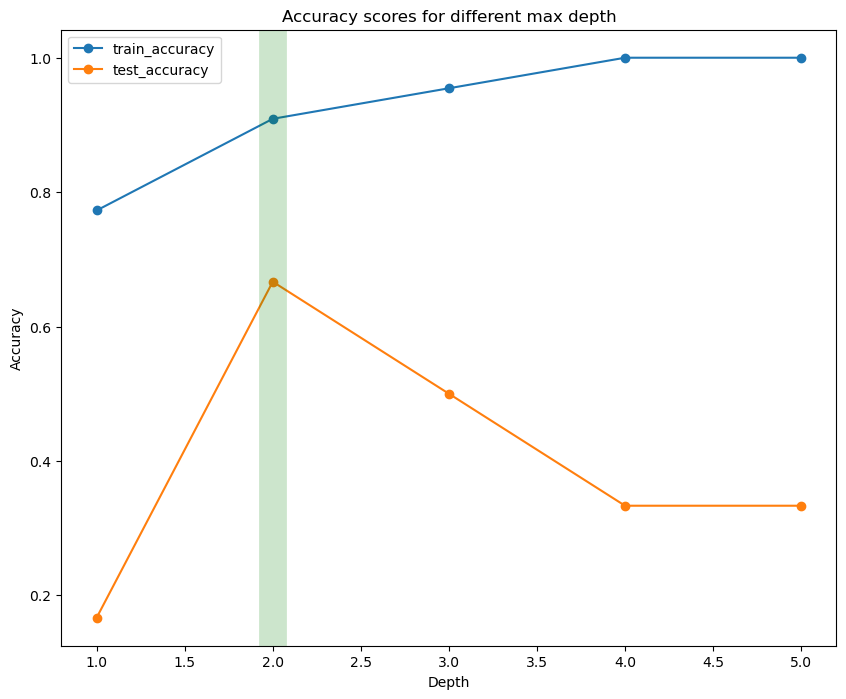

In [28]:
plt.figure(figsize=(10,8))

plt.plot(depth_settings, train_accuracy, marker = 'o', label = 'train_accuracy')
plt.plot(depth_settings, test_accuracy, marker = 'o', label = 'test_accuracy')

plt.axvline(x = 2, linewidth = 20, alpha = 0.2, color = "green")

plt.ylabel("Accuracy")
plt.xlabel('Depth')
plt.title('Accuracy scores for different max depth')

plt.legend();